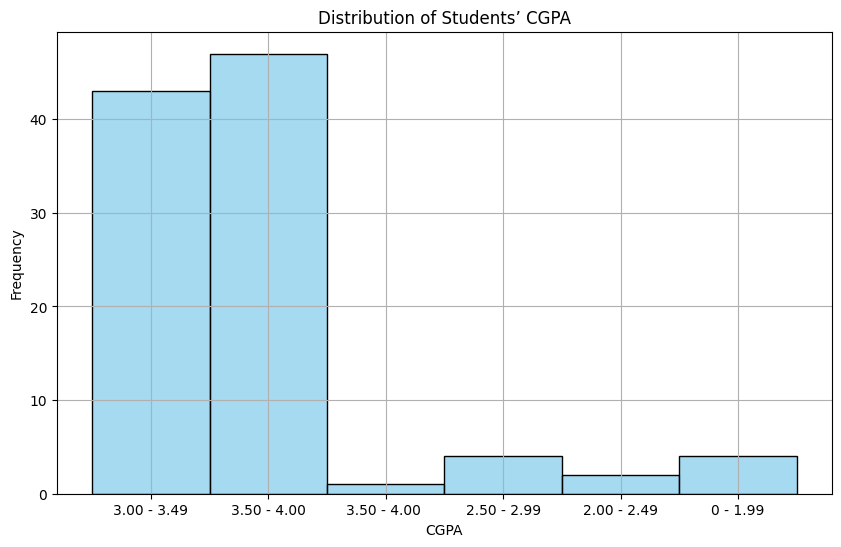

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

# Create the histogram for CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['What is your CGPA?'], kde=False, color='skyblue', bins=20)

# Customize the plot
plt.title('Distribution of Students’ CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()


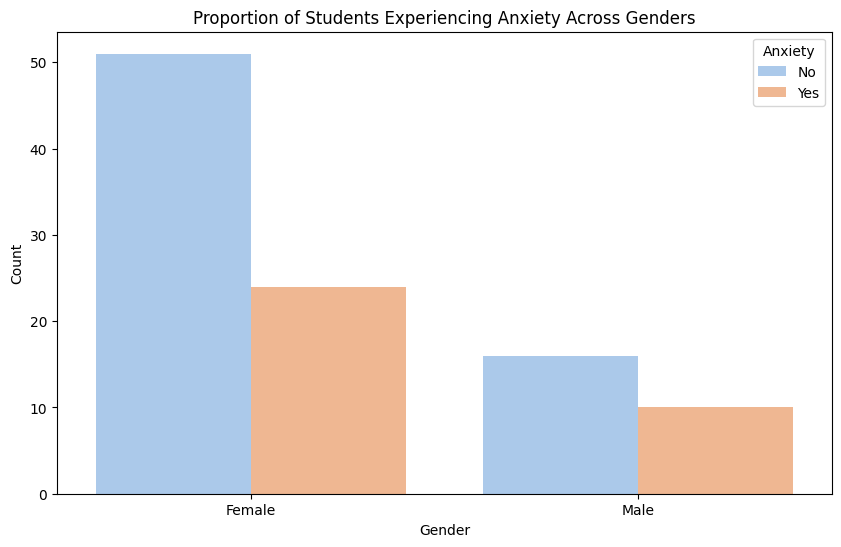

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='pastel')
plt.title('Proportion of Students Experiencing Anxiety Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Anxiety')

plt.show()


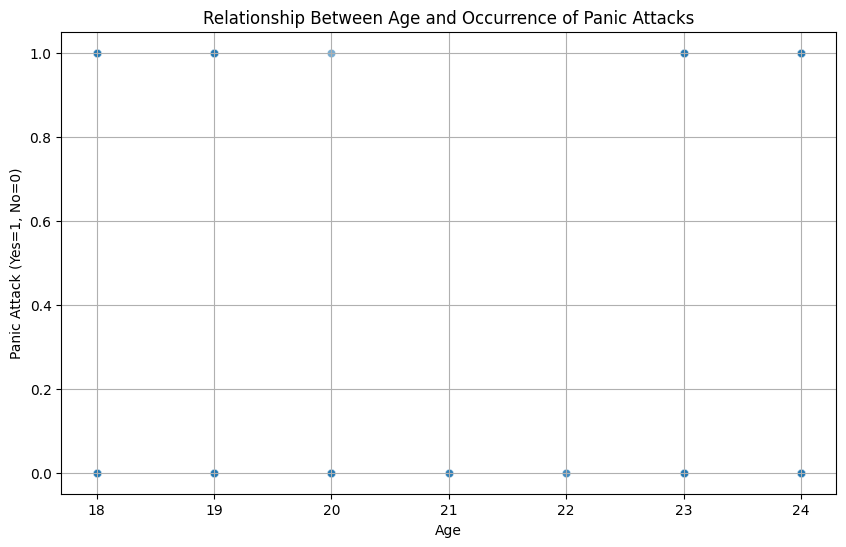

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

df['Panic Attack Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Panic Attack Numeric', alpha=0.6)
plt.title('Relationship Between Age and Occurrence of Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack (Yes=1, No=0)')
plt.grid(True)
plt.show()


<ipython-input-5-6c0f5a58d3c1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.rename(columns={'What is your CGPA?': 'CGPA'}, inplace=True)


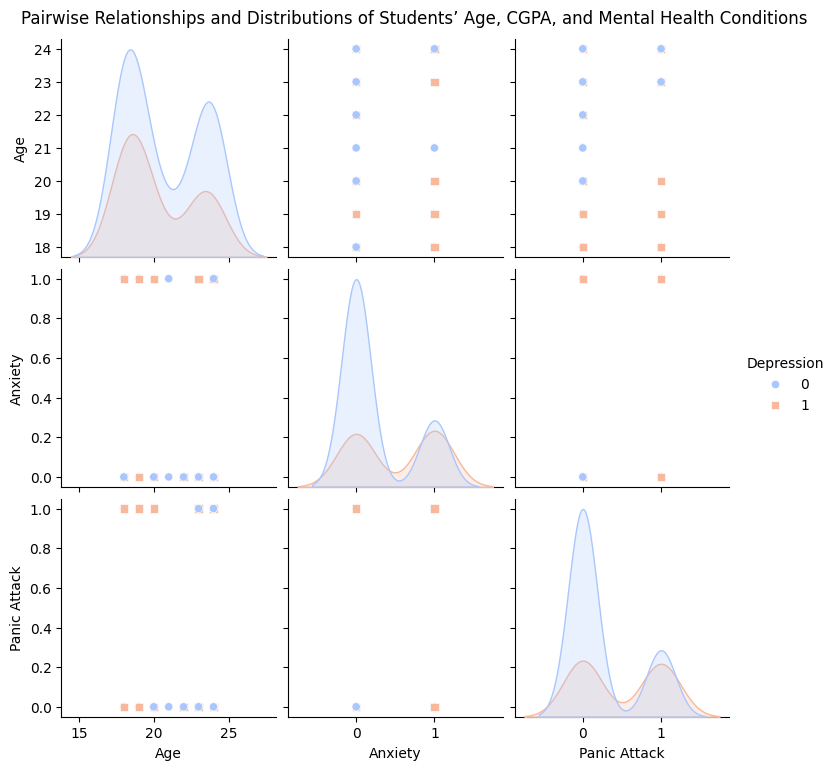

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic Attack'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

subset_df = df[['Age', 'What is your CGPA?', 'Depression', 'Anxiety', 'Panic Attack']]
subset_df.rename(columns={'What is your CGPA?': 'CGPA'}, inplace=True)
sns.pairplot(subset_df, hue='Depression', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairwise Relationships and Distributions of Students’ Age, CGPA, and Mental Health Conditions', y=1.02)
plt.show()


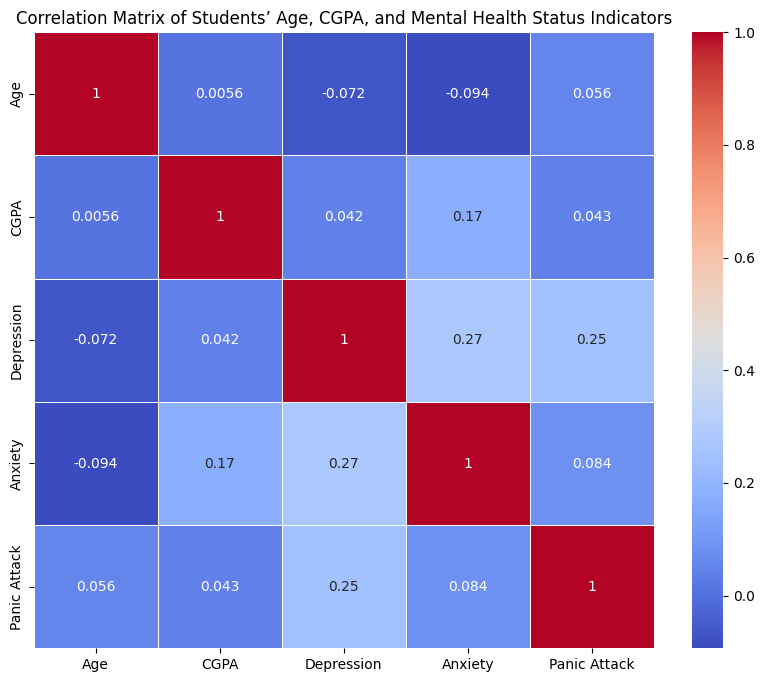

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic Attack'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

def convert_cgpa(cgpa_range):
    try:
        start, end = map(float, cgpa_range.split(' - '))
        return (start + end) / 2
    except:
        return None

df['CGPA'] = df['What is your CGPA?'].apply(convert_cgpa)

subset_df = df[['Age', 'CGPA', 'Depression', 'Anxiety', 'Panic Attack']]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Students’ Age, CGPA, and Mental Health Status Indicators')
plt.show()


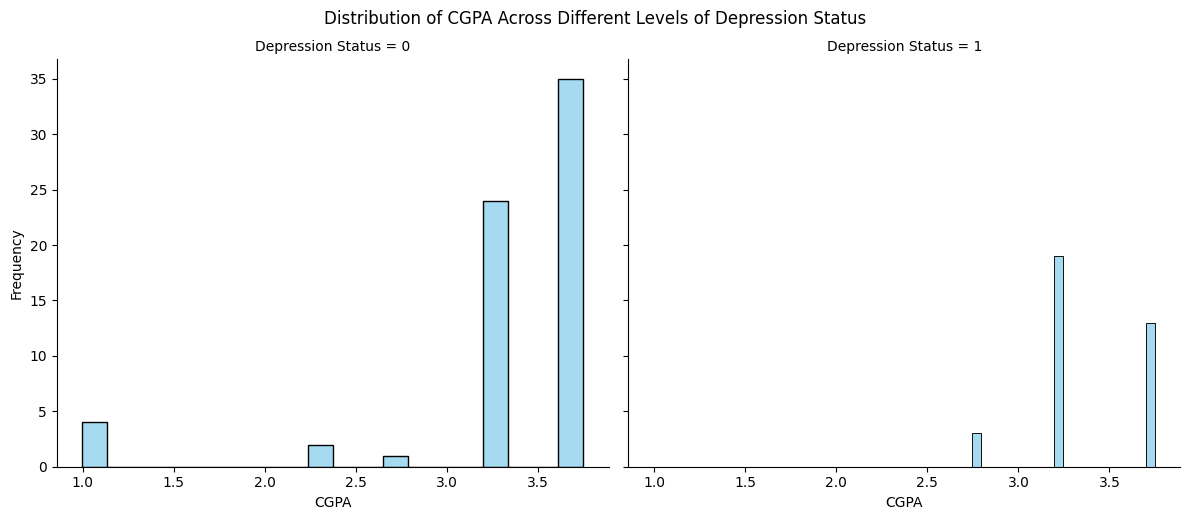

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Mental_Health_Dataset.csv')

df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})

def convert_cgpa(cgpa_range):
    try:
        start, end = map(float, cgpa_range.split(' - '))
        return (start + end) / 2
    except:
        return None

df['CGPA'] = df['What is your CGPA?'].apply(convert_cgpa)

g = sns.FacetGrid(df, col='Depression', height=5, aspect=1.2)
g.map(sns.histplot, 'CGPA', bins=20, color='skyblue')
g.set_axis_labels('CGPA', 'Frequency')
g.set_titles(col_template='Depression Status = {col_name}')
g.fig.suptitle('Distribution of CGPA Across Different Levels of Depression Status', y=1.03)
plt.show()
